In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot

# Consider only the below columns and prepare a prediction model for predicting Price.

# Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

# Importing dataset

In [3]:
cars=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
cars

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
cars.shape

(1436, 38)

In [5]:
cars=cars[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
cars

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# Descriptive Analysis

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [17]:
cars.shape

(1436, 9)

In [15]:
cars.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
cars.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Renaming 

In [20]:
cars=cars.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
cars.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Checking Missing Values

In [21]:
cars[cars.values==0.00]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


<AxesSubplot:>

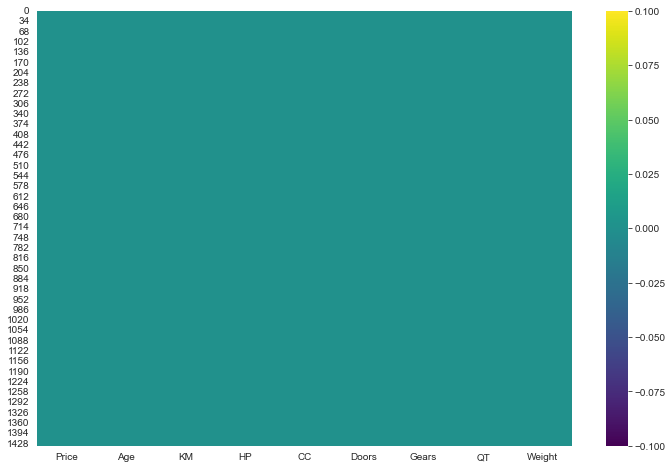

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(cars.isnull(),cmap='viridis')

# Checking Duplicates

In [23]:
cars.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [26]:
cars[cars.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


<AxesSubplot:>

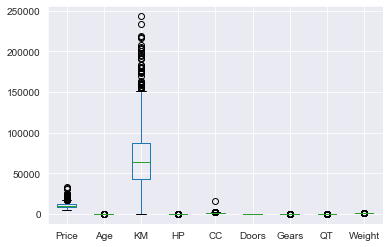

In [25]:
cars.boxplot()

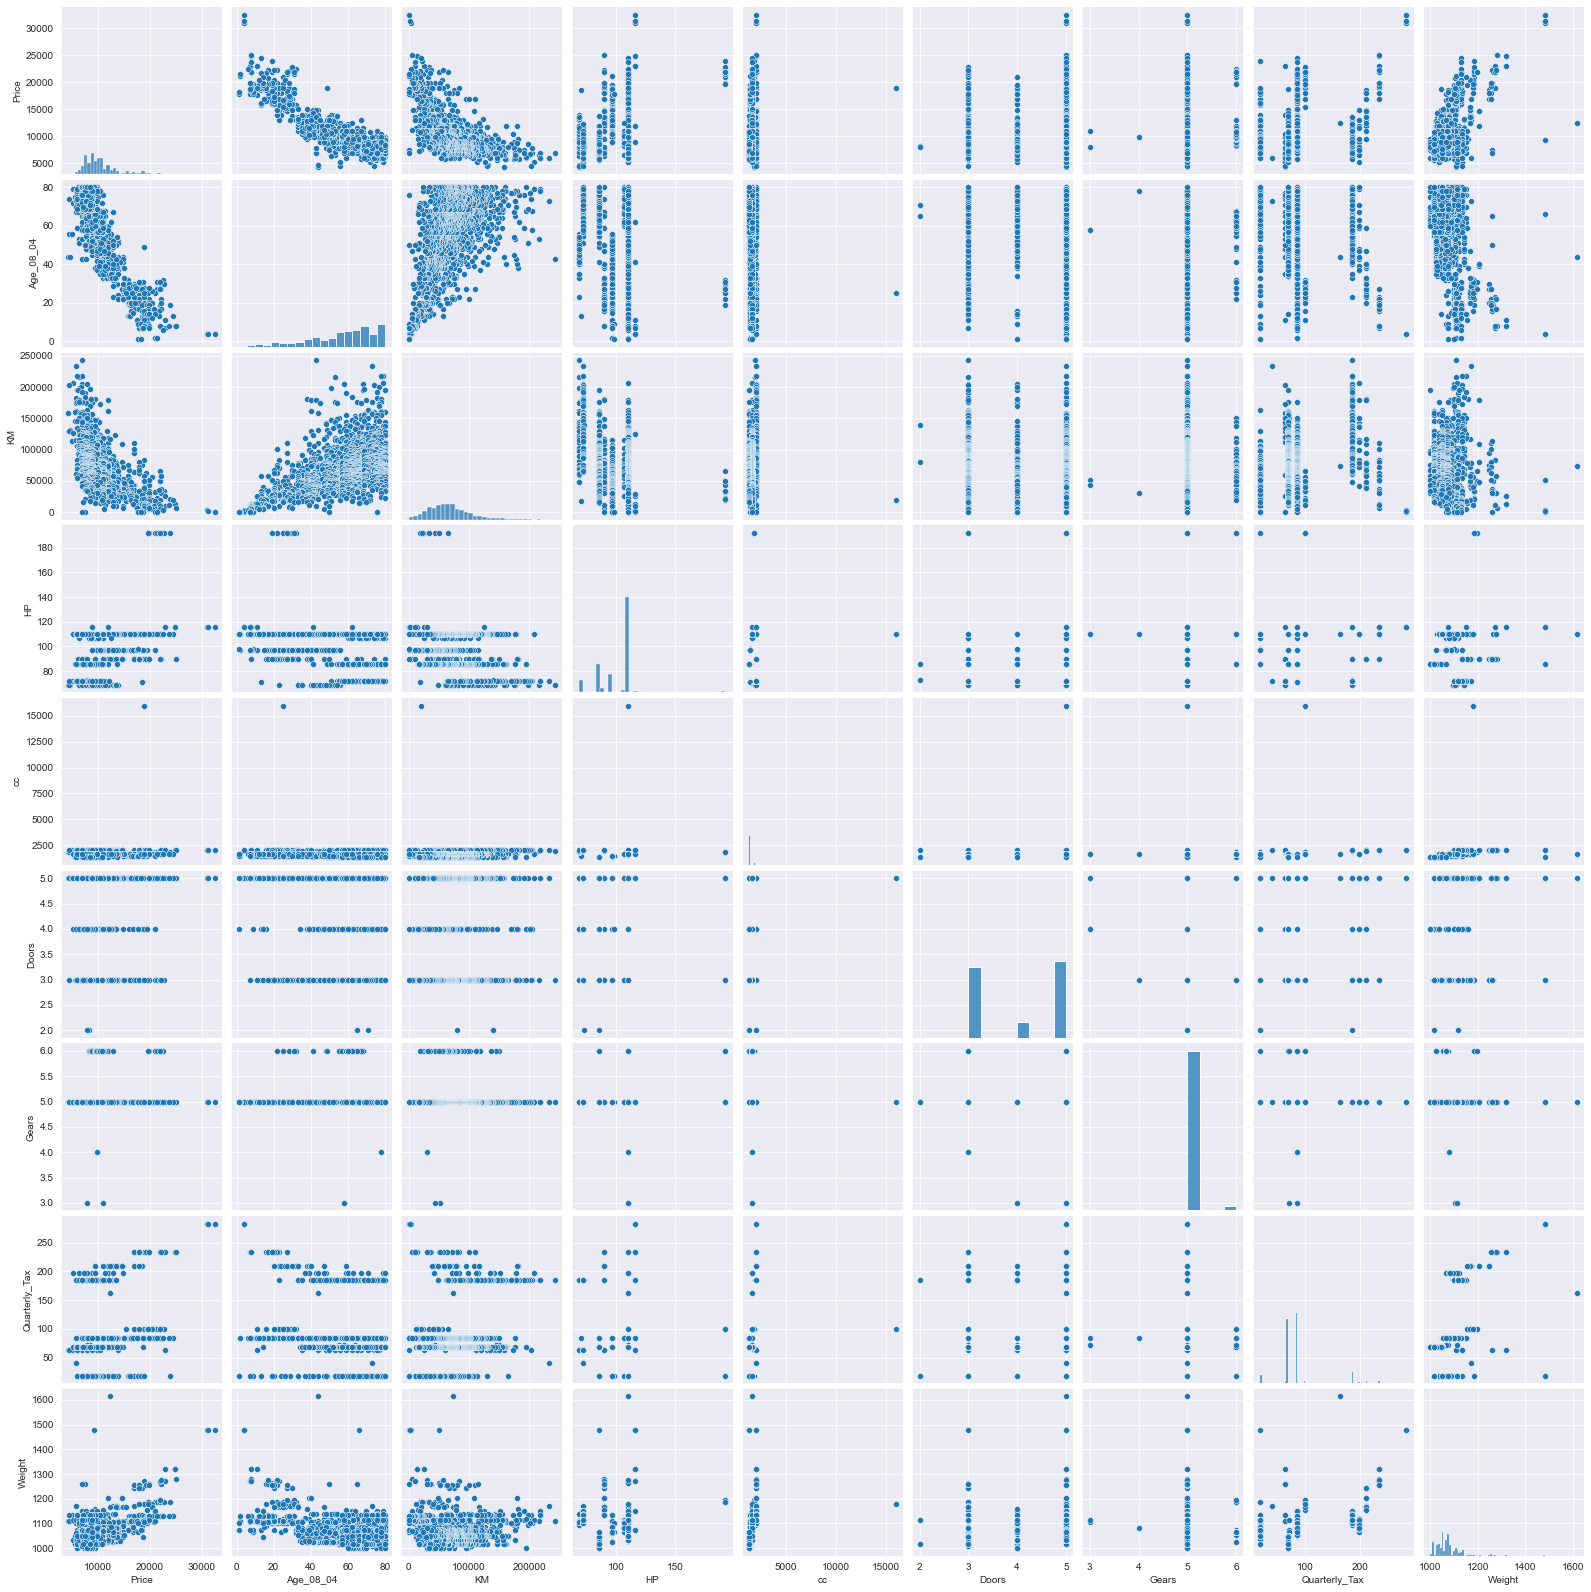

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [27]:
model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=cars).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:26:43   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [29]:
rsq_Age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=cars).fit().rsquared  
vif_Age = 1/(1-rsq_Age) 

rsq_KM = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=cars).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=cars).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_CC = smf.ols('CC~Age+HP+KM+Doors+Gears+QT+Weight',data=cars).fit().rsquared  
vif_CC = 1/(1-rsq_CC) 

rsq_Doors = smf.ols('Doors~Age+HP+KM+CC+Gears+QT+Weight',data=cars).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+HP+KM+CC+Doors+QT+Weight',data=cars).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

rsq_QT = smf.ols('QT~Age+HP+KM+CC+Doors+Gears+Weight',data=cars).fit().rsquared  
vif_QT = 1/(1-rsq_QT)

rsq_Weight = smf.ols('Weight~Age+HP+KM+CC+Doors+Gears+QT',data=cars).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


In [30]:
model.resid.min()

-9366.422081178116

In [31]:
model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

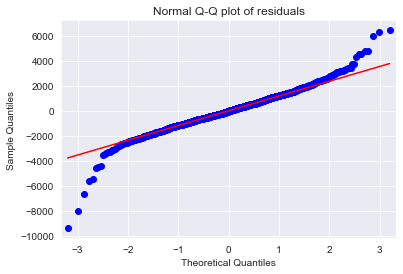

In [32]:
import statsmodels.api as smf
qqplot=smf.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual plot for Homoscedasticity

In [33]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

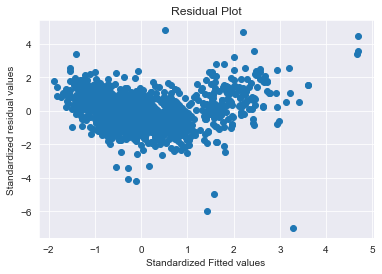

In [34]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residuals vs Regressors

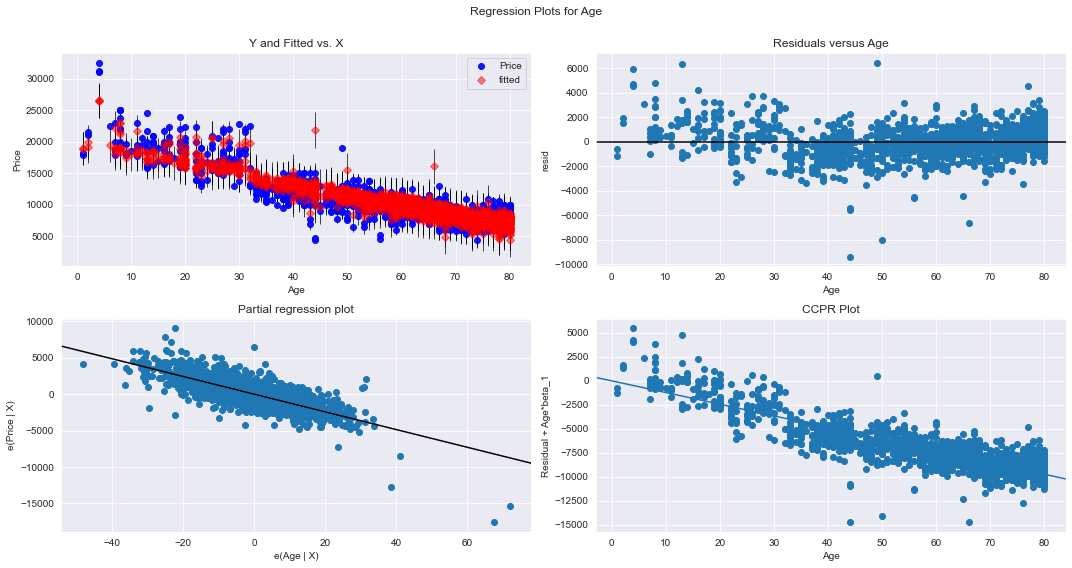

In [35]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

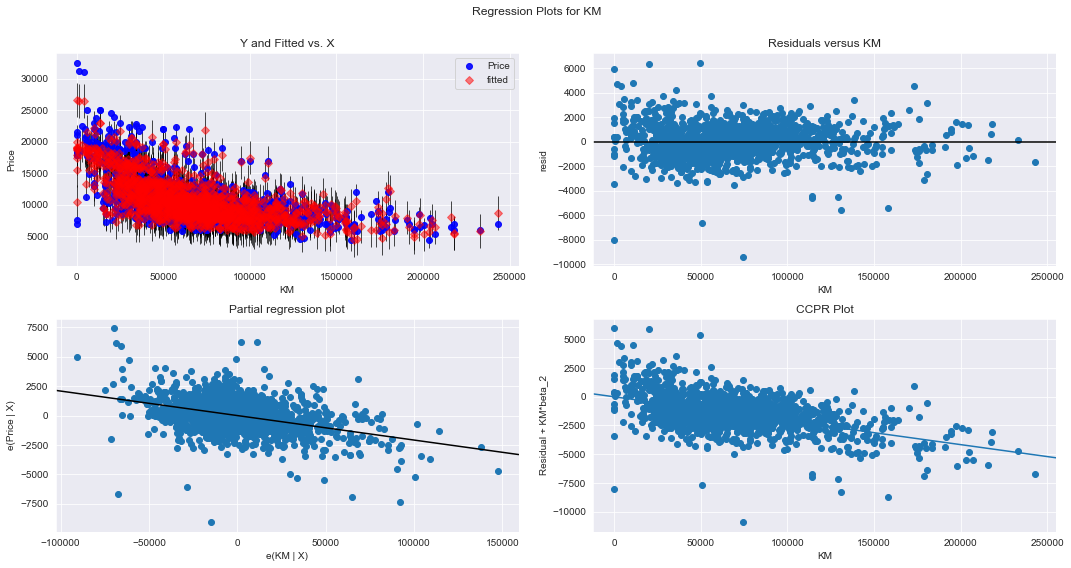

In [36]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

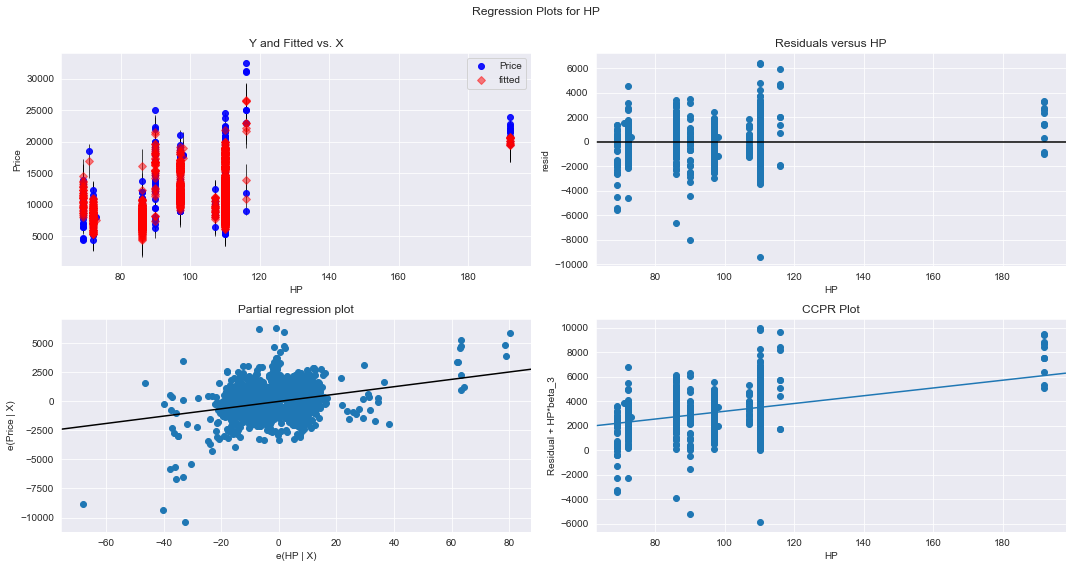

In [37]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

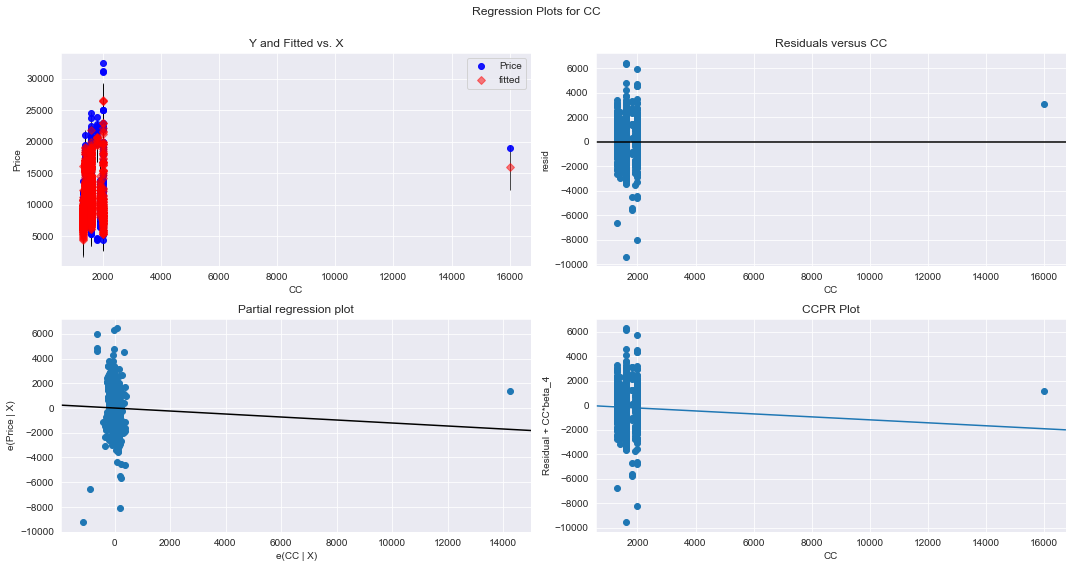

In [38]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show()

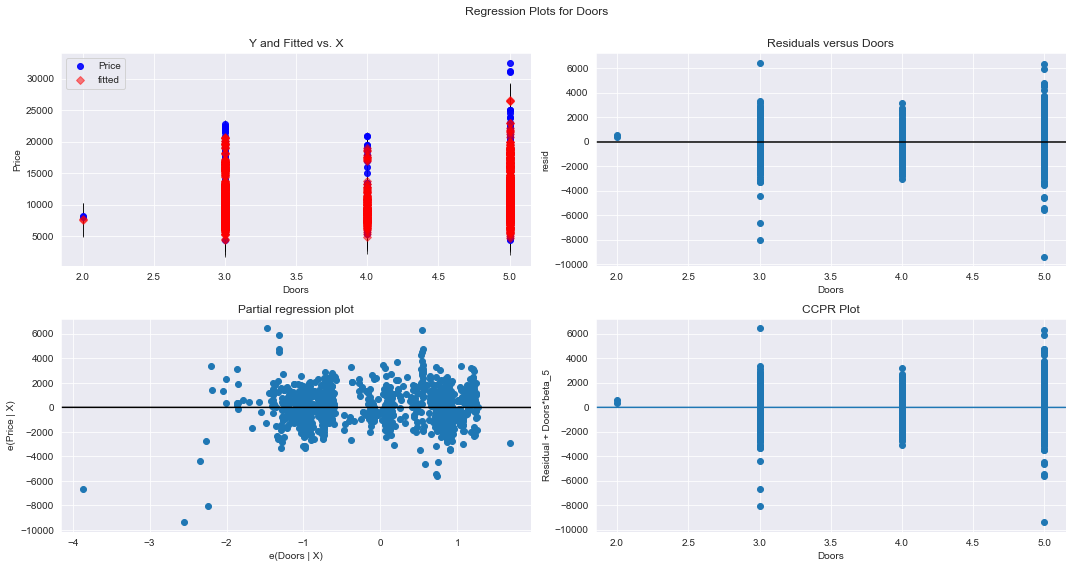

In [39]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

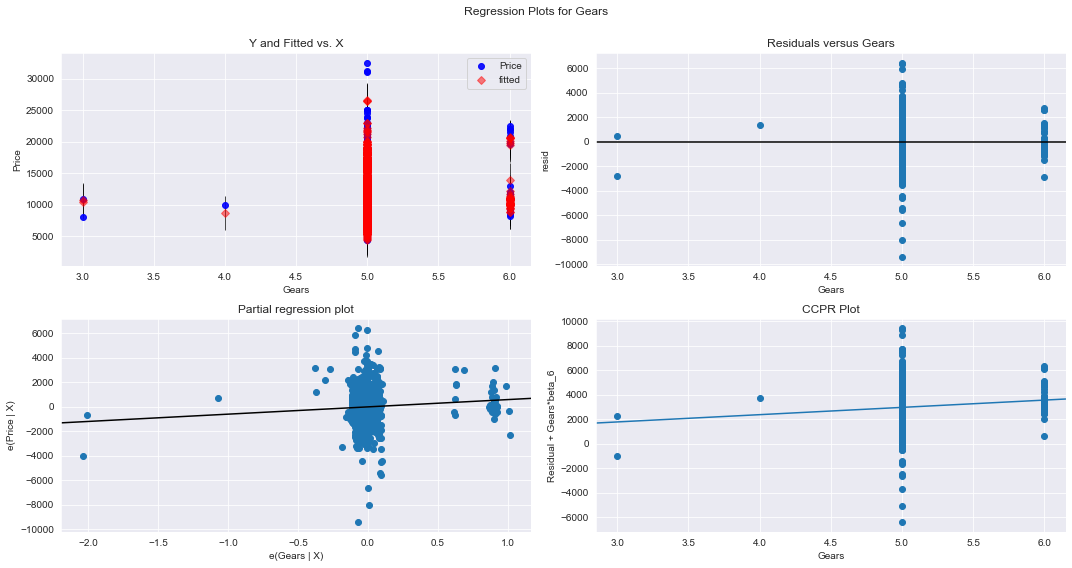

In [40]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

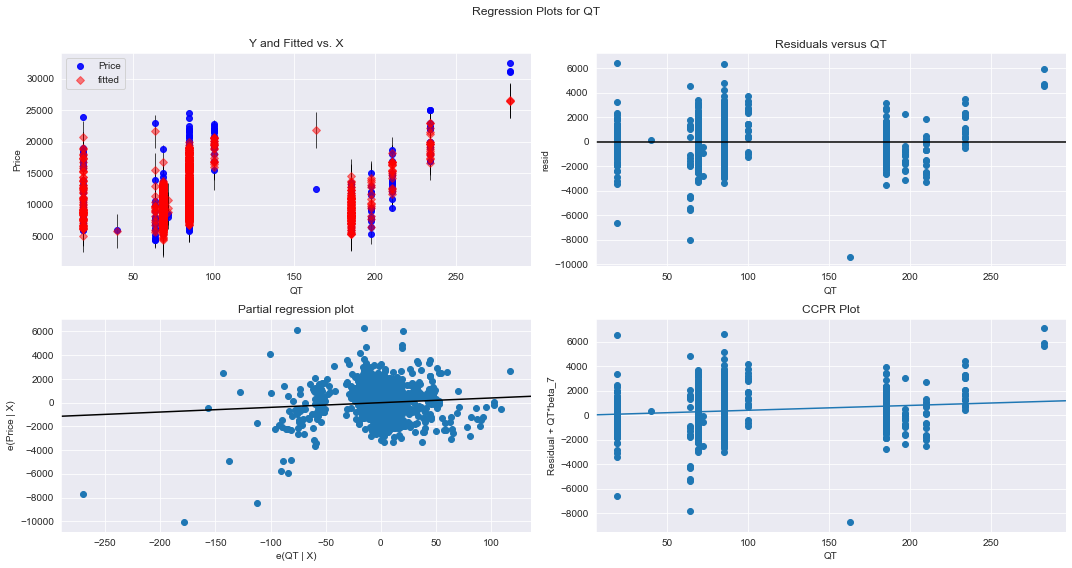

In [41]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

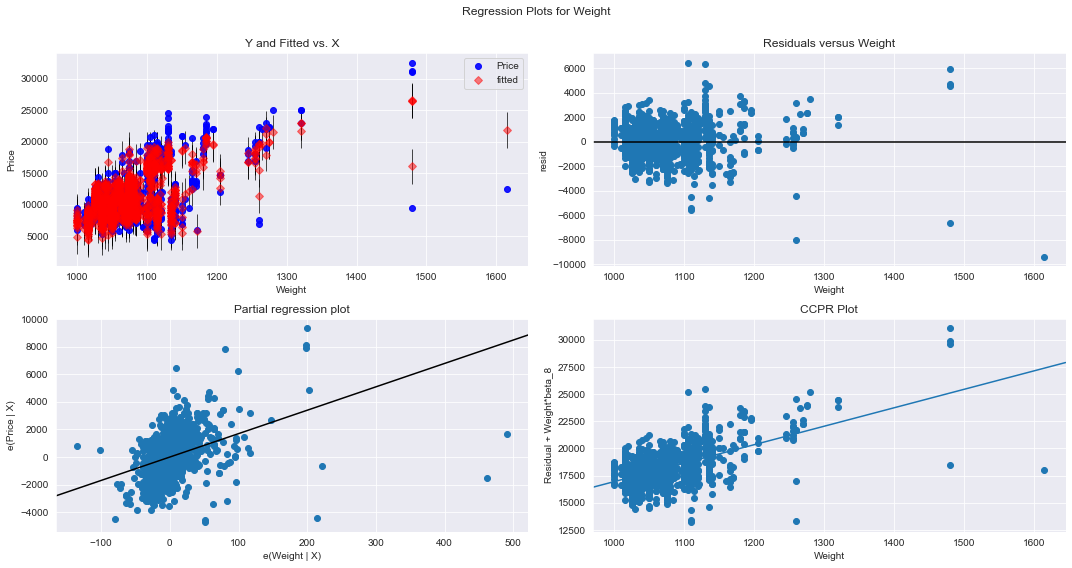

In [42]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics
# Detecting Influencers/Outliers
# Cook's Distance

In [43]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

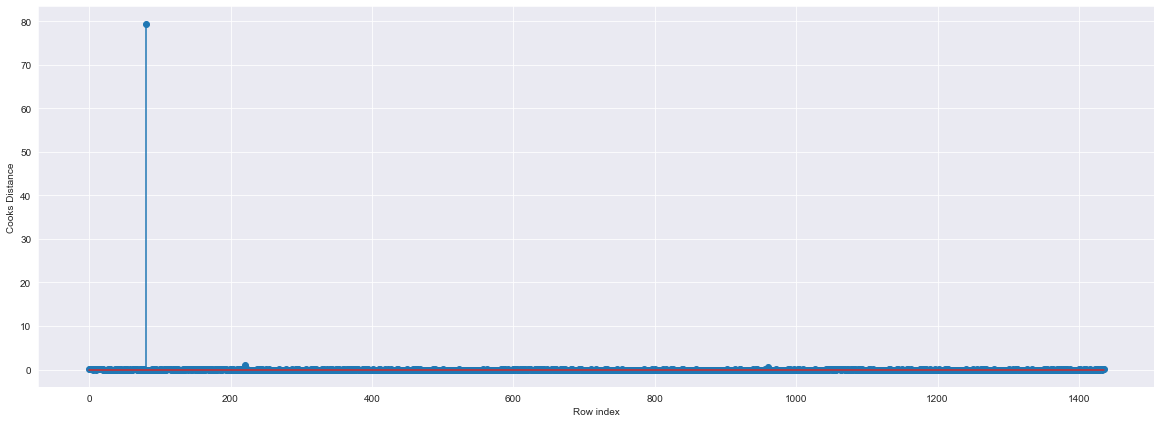

In [44]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [45]:
(np.argmax(c),np.max(c))

(80, 79.52010624141755)

# High Influence Points

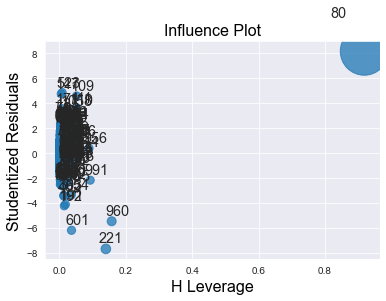

In [46]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [48]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [49]:
cars[cars.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [50]:
cars.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Improving the model

In [51]:
cars1=cars.drop(cars.index[[80]],axis=0).reset_index()
cars1

,index,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [52]:
cars1=cars1.drop(['index'],axis=1)

In [53]:
cars1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [55]:
model2 = sm.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=cars1).fit()

In [56]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:01:09   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age         -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM            -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP            39.3463      2.911     13.516      0.000      33.636      45.057
CC            -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors        -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears        523.9416    192.865      2.717      0.007     145.612     902.271
QT             9.0440      1.425      6.348      0.000       6.249      11.839
Weight        20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
model_influence_V = model2.get_influence()
(c_V, _) = model_influence_V.cooks_distance

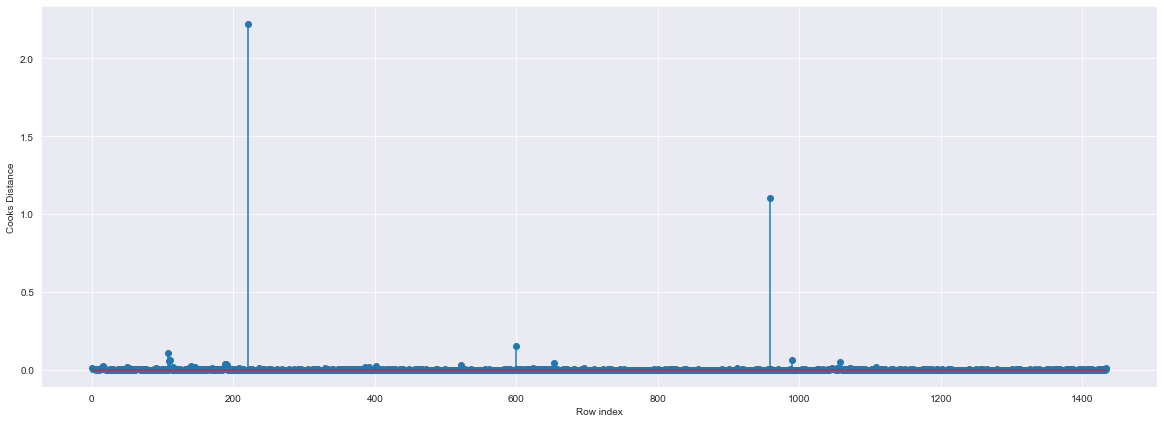

In [59]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars1)), np.round(c_V, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

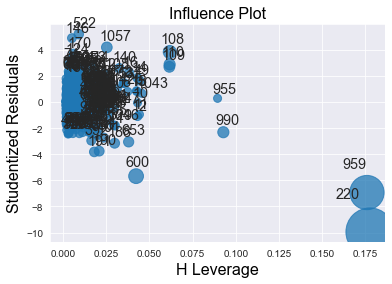

In [60]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [61]:
k = cars1.shape[1]
n = cars1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

# Observation: no high influence

# Predicting

In [62]:
predicted = pd.DataFrame()
predicted['Age'] = cars1.Age
predicted['KM'] = cars1.KM
predicted['HP'] = cars1.HP
predicted['CC'] = cars1.CC
predicted['Doors'] = cars1.Doors
predicted['Gears'] = cars1.Gears
predicted['QT'] = cars1.QT
predicted['Weight'] = cars1.Weight
predicted['Price'] = cars1.Price
predicted['Predicted_Price'] = pd.DataFrame(model2.predict(predicted[['Age','KM','HP','CC','Doors','Gears','QT','Weight']]))
predicted

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price,Predicted_Price
0,23,46986,90,2000,3,5,210,1165,13500,16528.990607
1,23,72937,90,2000,3,5,210,1165,13750,16065.803813
2,24,41711,90,2000,3,5,210,1165,13950,16502.686471
3,26,48000,90,2000,3,5,210,1165,14950,16149.527067
4,30,38500,90,2000,3,5,210,1170,13750,15938.095051
...,...,...,...,...,...,...,...,...,...,...
1430,69,20544,86,1300,3,5,69,1025,7500,8971.183912
1431,72,19000,86,1300,3,5,69,1015,10845,8435.722285
1432,71,17016,86,1300,3,5,69,1015,8500,8591.588786
1433,70,16916,86,1300,3,5,69,1015,7250,8713.828687
